# Boston Housing with Linear Regression

** With this data our objective is create a model using linear regression to predict the houses price  **

The data contains the following columns:
* 'crim': per capita crime rate by town.
* 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
* 'indus': proportion of non-retail business acres per town.
* 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* 'nox': nitrogen oxides concentration (parts per 10 million).
* 'rm': average number of rooms per dwelling.
* 'age': proportion of owner-occupied units built prior to 1940.
* 'dis': weighted mean of distances to five Boston employment centres.
* 'rad': index of accessibility to radial highways.
* 'tax': full-value property-tax rate per $10,000.
* 'ptratio': pupil-teacher ratio by town
* 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* 'lstat': lower status of the population (percent).
* 'medv': median value of owner-occupied homes in $$1000s

Ps: this is my first analysis, i'm learning how to interpret the plots.

**Lets Start**

First we need to prepare our enviroment importing some librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing DataSet and take a look at Data
BostonTrain = pd.read_csv("./data/boston_train.csv")

** Here we can look at the BostonTrain data **

In [3]:
#BostonTrain.head()
#BostonTrain.info()
BostonTrain.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [24]:
BostonTrain.std()/BostonTrain.mean()

crim       2.187954
zn         2.121280
indus      0.619660
chas       3.961961
nox        0.206328
rm         0.112351
age        0.412353
dis        0.534005
rad        0.907464
tax        0.417422
ptratio    0.116642
black      0.240870
lstat      0.564725
medv       0.402897
dtype: float64

** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

In [4]:
#ID columns does not relevant for our analysis.
BostonTrain.drop('ID', axis = 1, inplace=True)

# Training Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable

In [5]:
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

**Import sklearn librarys:**    
train_test_split, to split our data in two DF, one for build a model and other to validate.                                     
LinearRegression, to apply the linear regression.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [8]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [9]:
predictions = lm.predict(X_test)

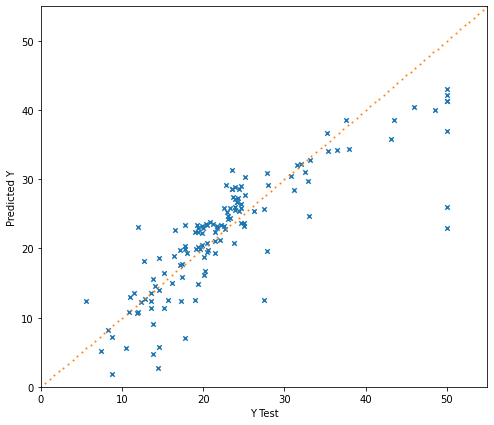

In [10]:
plt.rcParams["figure.figsize"] = (8,7)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim([0, 11*int(max(y_test)/10)])
plt.ylim([0, 11*int(max(y_test))/10])
plt.scatter(y_test,predictions,s=20,marker="x")

x = np.linspace(0, 11*int(max(y_test)/10), 2*int(max(y_test)))
plt.scatter(x, x,s=1);

In [11]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6385335052434535
MSE: 29.528432703715932
RMSE: 5.4340070577535995


Considering the RMSE: we can conclude that  this model average error is RMSE at medv, which means RMSE *1000  in money

Linear regression does not require any particular distribution of residuals:
- If the residuals do have a Normal distribution, the simple least squares equations are optimal
- For the model to be unbiased, the average value of the error term must equal zero

Let's check both assumptions:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


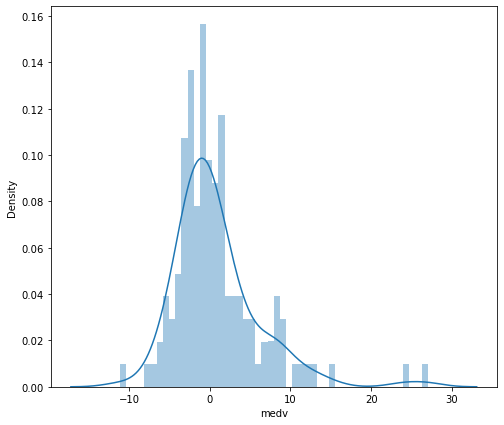

In [12]:
sns.distplot((y_test-predictions),bins=50);

Let's check is the error is normally distributed to validated the hypothesis on which it is based the linear regression model

As more normal distribution, better it is.

Intercept of the fitted line:

In [13]:
lm.intercept_

24.76185291838505

Hyperplane slopes (= linear regression coefficients):

In [14]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.050619
zn,0.014097
indus,-0.008293
chas,2.817104
nox,-16.378558
rm,4.513586
age,-0.011912
dis,-1.320971
rad,0.268538
tax,-0.011013


How to interpret those coefficients:
    they are in function of Medv, so 
    
    - for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit
    - for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.
    

>Price prediction error is `medv*1000` because the medv is expressed in thousands of dollars